In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import h5py

from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr

In [2]:
def tif2array(file_path, dtype=np.uint8):
    """
    read GeoTiff and convert to numpy.ndarray.
    inputs:
        file_path (str) : file path of the input GeoTiff file
    return:
        image(np.array) : image for each bands
        dataset : for gdal's data drive
    """
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)

    if dataset is None:
        return None

    # Allocate our array using the first band's datatype
    image_datatype = dataset.GetRasterBand(1).DataType
    image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                     dtype=dtype)

    # Loop over all bands in dataset
    for b in range(dataset.RasterCount):
        # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
        band = dataset.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        image[:, :, b] = band.ReadAsArray()#buf_type=gdalconst.GDT_Byte)

    #image = image[2:-2,2:-2,:]

    return image

In [7]:
path = '/home/philipp/Data/modis/aligned/sos_2020.tif'
sos_2020 = tif2array(path, dtype=np.int16)
path = '/home/philipp/Data/modis/aligned/sos_2019.tif'
sos_2019 = tif2array(path, dtype=np.int16)
path = '/home/philipp/Data/modis/aligned/sos_2018.tif'
sos_2018 = tif2array(path, dtype=np.int16)
path = '/home/philipp/Data/modis/aligned/koeppen.tif'
koeppen = tif2array(path, dtype=np.int8)

In [8]:
print(sos_2020.shape)
print(koeppen.shape)

(1299, 1837, 1)
(1299, 1837, 1)


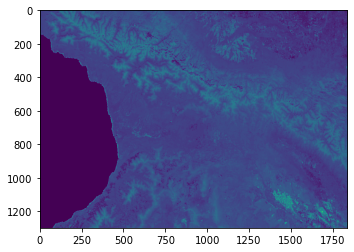

In [9]:
plt.imshow(sos_2020[:,:])

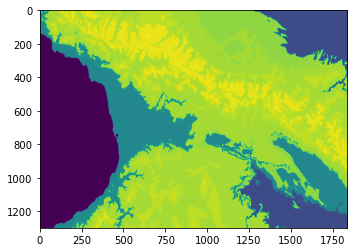

In [10]:
plt.imshow(koeppen[:,:])

In [11]:
np.unique(koeppen)

array([ 0,  7,  8,  9, 14, 15, 18, 25, 26, 27, 29, 30], dtype=int8)

In [12]:
climate = [np.where(koeppen.flatten() == 14)[0],\
            np.where(koeppen.flatten() == 26)[0],\
            np.where(koeppen.flatten() == 27)[0],\
            np.where(koeppen.flatten() == 29)[0]]

In [13]:
sos_cl_2018 = []
sos_cl_2019 = []
sos_cl_2020 = []

for i in range(4):
    sos_cl_2018.append(sos_2018.flatten()[climate[i]])
    sos_cl_2019.append(sos_2019.flatten()[climate[i]])
    sos_cl_2020.append(sos_2020.flatten()[climate[i]])

In [14]:
i = 0

print(sos_cl_2018[i].min(), sos_cl_2019[i].min(), sos_cl_2020[i].min())

print(sos_cl_2018[i].mean(), sos_cl_2019[i].mean(), sos_cl_2020[i].mean())
print(np.median(sos_cl_2018[i]), np.median(sos_cl_2019[i]), np.median(sos_cl_2020[i]))

print(sos_cl_2018[i].max(), sos_cl_2019[i].max(), sos_cl_2020[i].max())

print(sos_cl_2018[i].std(), sos_cl_2019[i].std(), sos_cl_2020[i].std())

-1 -1 -1
56.67728796986786 66.39229964125128 70.57818794025904
57.0 67.0 69.0
363 363 347
16.02626769454115 15.942219412187448 18.686719054556647


In [16]:
i = 2

print(sos_cl_2018[i].min(), sos_cl_2019[i].min(), sos_cl_2020[i].min())

print(sos_cl_2018[i].mean(), sos_cl_2019[i].mean(), sos_cl_2020[i].mean())
print(np.median(sos_cl_2018[i]), np.median(sos_cl_2019[i]), np.median(sos_cl_2020[i]))

print(sos_cl_2018[i].max(), sos_cl_2019[i].max(), sos_cl_2020[i].max())

print(sos_cl_2018[i].std(), sos_cl_2019[i].std(), sos_cl_2020[i].std())

0 0 0
88.58099955886114 96.6054054965341 96.51154407033496
87.0 95.0 96.0
340 346 350
15.980196487664573 15.85702560973095 17.13606406505433
